<a href="https://colab.research.google.com/github/Chaitra-07/chai/blob/master/Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Weather firecasting

The CSV file includes a hourly/daily summary for Hungary aread

Data available in the hourly response:

1. time
2. summary
3. precipType
4. temperature
5. apparentTemperature
6. humidity
7. windSpeed
8. windBearing
9. visibility
10. loudCover
11. pressure

I will split this dataset into training and testing dataset


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [5]:
dataset = pd.read_csv('gdrive/My Drive/Datasets/weatherHistory.csv')

In [6]:
dataset.shape

(96453, 12)

In [7]:
dataset.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [8]:
# Check to see if there are any missing values in our data set
dataset.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                  True
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

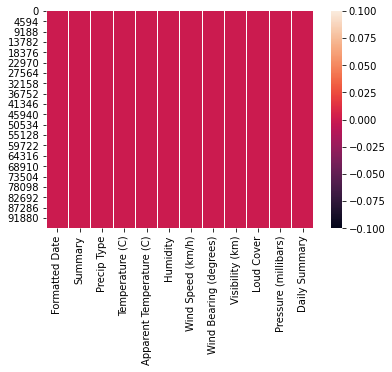

In [74]:
sns.heatmap(dataset.isnull())
#No null values are found

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


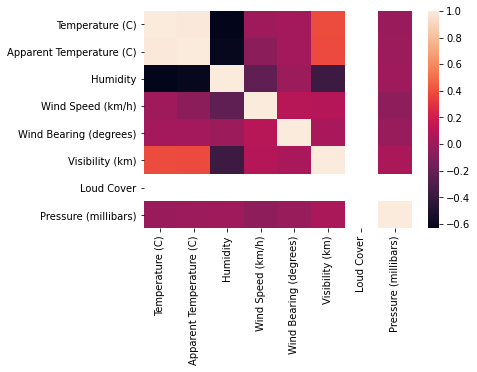

In [79]:
#Correlation Matrix
corr = dataset.corr()
sns.heatmap(corr)
corr

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [11]:
#There are some NaN values in the column precipitation type. We should deal with them properly.
dataset['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [13]:
#We have 2 values ‘rain’ and ‘snow’ in this column and the count of rain is much more than count of snow so we can simply replace all the missing values with ‘rain’ 
dataset.loc[dataset['Precip Type'].isnull(),'Precip Type']='rain'

In [16]:
#Lets check whether all the null values are replaced
dataset.isnull().any()

Formatted Date              False
Summary                     False
Precip Type                 False
Temperature (C)             False
Apparent Temperature (C)    False
Humidity                    False
Wind Speed (km/h)           False
Wind Bearing (degrees)      False
Visibility (km)             False
Loud Cover                  False
Pressure (millibars)        False
Daily Summary               False
dtype: bool

In [53]:
#imputing binary values for precip type
dataset.loc[dataset['Precip Type']=='rain','Precip Type']=1
dataset.loc[dataset['Precip Type']=='snow','Precip Type']=0


In [57]:
dataset['Precip Type']

0        1
1        1
2        1
3        1
4        1
        ..
96448    1
96449    1
96450    1
96451    1
96452    1
Name: Precip Type, Length: 96453, dtype: object

In [58]:
#splitting into X and y
dataset_num = dataset[list(dataset.dtypes[dataset.dtypes!=object].index)]
X = dataset_num.drop('Temperature (C)', axis=1).copy()
y = dataset_num['Temperature (C)']

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=40)


In [86]:
X_train.head()

,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
89316,0.438889,0.82,13.2825,194.0,8.3398,0.0,1019.35
32206,18.022222,0.66,3.4776,145.0,15.1501,0.0,1018.22
30941,13.105556,0.84,6.1019,143.0,15.1501,0.0,1019.26
81705,-5.383333,0.78,33.0372,31.0,9.9820,0.0,1012.32
2291,-4.727778,0.81,17.7100,310.0,11.2056,0.0,1023.59


In [87]:
#Implementation of the first Model — Linear Regression

from sklearn.linear_model import LinearRegression

model = LinearRegression()  
model.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
y_pred = model.predict(X_test)
#Calculating the error
np.mean((y_pred-y_test)**2)

0.9041763036918032

In [89]:
pd.DataFrame({'Actual Value':y_test,
              'Predicted Value':y_pred,
              'Difference':(y_test-y_pred)})

,Actual Value,Predicted Value,Difference
55917,2.777778,1.741941,1.035836
58165,14.844444,17.333937,-2.489492
75349,15.955556,17.117662,-1.162106
36329,21.033333,21.711107,-0.677774
15729,7.161111,6.703371,0.457740
...,...,...,...
78007,7.861111,8.473060,-0.611949
26610,18.888889,19.248232,-0.359343
80073,22.716667,22.150982,0.565685
50334,7.505556,8.759730,-1.254175


The error for this model using Linear regression is — 0.90188

In [90]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor()          # create  DecisionTreeReg with sklearn
model_dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [91]:
y_predictdt = model_dt.predict(X_test)
np.mean((y_predictdt-y_test)**2)

0.008888434509535694

The Error using Decision tree is very less i.e 0.8%


In [92]:
pd.DataFrame({'Actual Value':y_test,
              'Predicted Value':y_predictdt,
              'Difference':(y_test-y_predictdt)})

,Actual Value,Predicted Value,Difference
55917,2.777778,2.777778,-4.440892e-16
58165,14.844444,14.844444,7.105427e-15
75349,15.955556,15.955556,-3.552714e-15
36329,21.033333,21.033333,0.000000e+00
15729,7.161111,7.183333,-2.222222e-02
...,...,...,...
78007,7.861111,7.855556,5.555556e-03
26610,18.888889,18.888889,8.881784e-14
80073,22.716667,22.716667,0.000000e+00
50334,7.505556,7.505556,0.000000e+00


In [93]:
#Random forest with max depth=10

from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=0,max_depth=10)
model_rf.fit(X_train,y_train)
y_predictrf = model_rf.predict(X_test)
np.mean((y_predictrf-y_test)**2)

0.009208853956717672

In [94]:
pd.DataFrame({'Actual Value':y_test,
              'Predicted Value':y_predictrf,
              'Difference':(y_test-y_predictrf)})

,Actual Value,Predicted Value,Difference
55917,2.777778,2.637407,0.140371
58165,14.844444,14.847059,-0.002615
75349,15.955556,15.956338,-0.000783
36329,21.033333,21.040910,-0.007577
15729,7.161111,7.087081,0.074030
...,...,...,...
78007,7.861111,7.807660,0.053451
26610,18.888889,18.887183,0.001706
80073,22.716667,22.718767,-0.002100
50334,7.505556,7.511636,-0.006080


In [95]:
#Random forest with max depth=50
from sklearn.ensemble import RandomForestRegressor

model_rf1 = RandomForestRegressor(n_estimators=100, random_state=0,max_depth=50)
model_rf1.fit(X_train,y_train)
y_predictrf1 = model_rf1.predict(X_test)
np.mean((y_predictrf1-y_test)**2)

0.0026680643153175424

In [96]:
pd.DataFrame({'Actual Value':y_test,
              'Predicted Value':y_predictrf1,
              'Difference':(y_test-y_predictrf1)})

,Actual Value,Predicted Value,Difference
55917,2.777778,2.769944,7.833333e-03
58165,14.844444,14.844444,8.881784e-15
75349,15.955556,15.955556,1.953993e-14
36329,21.033333,21.033333,2.486900e-14
15729,7.161111,7.142611,1.850000e-02
...,...,...,...
78007,7.861111,7.854667,6.444444e-03
26610,18.888889,18.888889,0.000000e+00
80073,22.716667,22.716833,-1.666667e-04
50334,7.505556,7.505000,5.555556e-04


In [98]:
#model evaluation using r2 
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(y_test, y_predictdt)));

R2 Score: 1.0
